In [1]:
import pandas as pd
df = pd.read_csv('c:/work/data/ozone/ozone2.csv')
df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [2]:
df['Result'].value_counts()

Result
1    81
0    72
Name: count, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

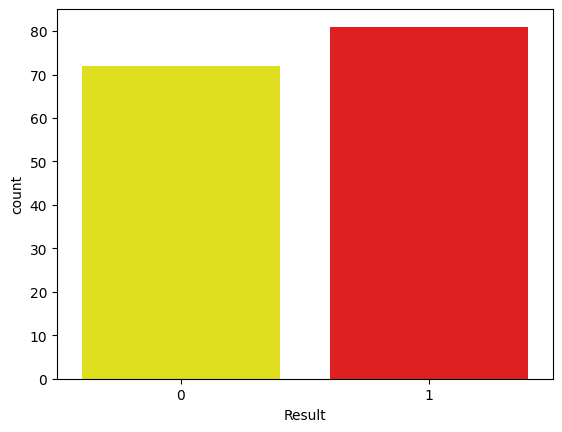

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot(x = 'Result', data=df, palette=colors)
# 불균형 데이터셋

In [5]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

array([[<Axes: xlabel='Solar.R', ylabel='Solar.R'>,
        <Axes: xlabel='Wind', ylabel='Solar.R'>,
        <Axes: xlabel='Temp', ylabel='Solar.R'>],
       [<Axes: xlabel='Solar.R', ylabel='Wind'>,
        <Axes: xlabel='Wind', ylabel='Wind'>,
        <Axes: xlabel='Temp', ylabel='Wind'>],
       [<Axes: xlabel='Solar.R', ylabel='Temp'>,
        <Axes: xlabel='Wind', ylabel='Temp'>,
        <Axes: xlabel='Temp', ylabel='Temp'>]], dtype=object)

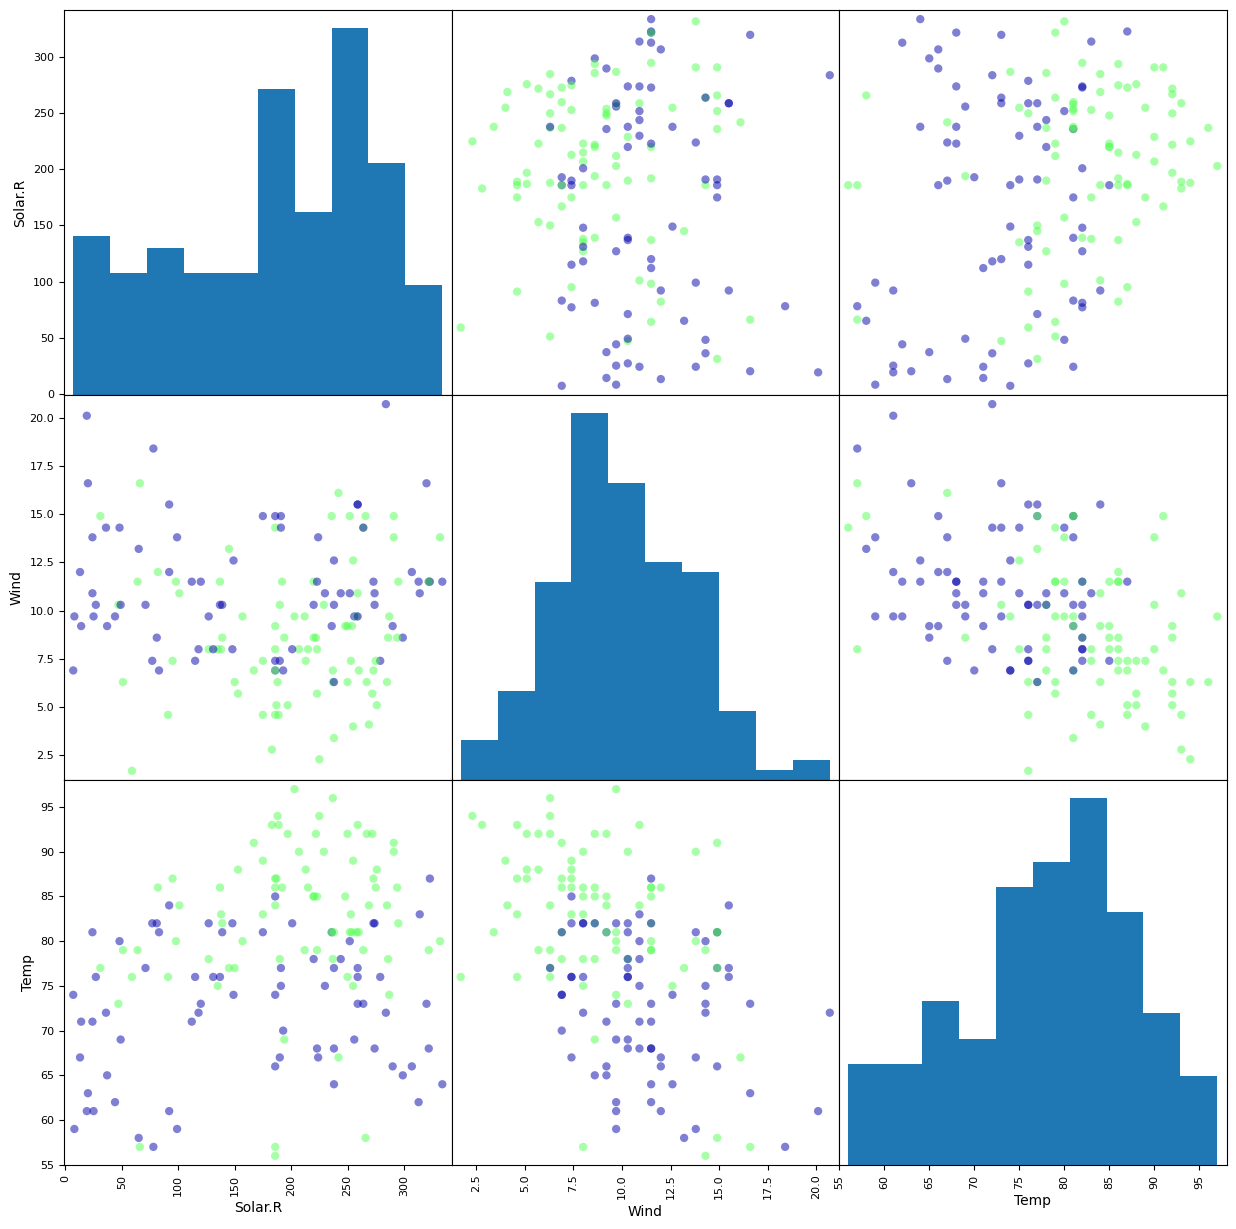

In [6]:
import mglearn
# 산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [7]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])

df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp.Result.value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [8]:
X = X_samp[cols]
y = y_samp['Result']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

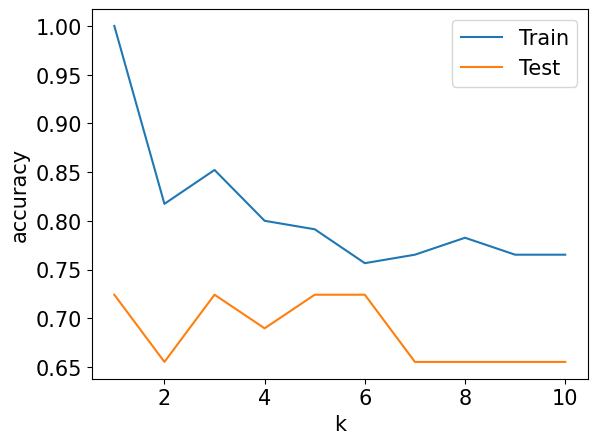

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_rate = []
test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용

neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train, y_train))

    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test, y_test))

plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="Train")
plt.plot(neighbors, test_rate, label="Test")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()

In [13]:
import numpy as np
max_rate = max(test_rate)
idx = np.argmax(test_rate)
print('최적의 k: ', idx+1)
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

최적의 k:  1


In [15]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 0.7913043478260869
검증용: 0.7241379310344828


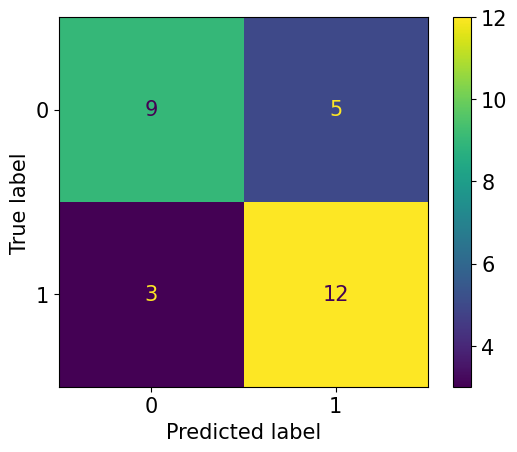

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred), display_labels=model.classes_).plot()